<div align="center">
  <b> <font size="6">One-Hot Encoding for Multiple Linear Regression - Exercise </font> </b>
</div>

In [41]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [42]:
# Load the dataset into pandas dataframe
df = pd.read_csv("E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\carprices.csv")     
# Change this location based on the location of dataset in your machine

In [43]:
# Display the first five records
df    

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [44]:
# Dataset shape (number of rows and columns)
df.shape

(13, 4)

### Step 2: Apply EDA

You may apply univariate and bivariate analysis

### Step 3. Pre-process and extract the features

##### Unique values in the dataset

In [45]:
df.nunique()

Car Model         3
Mileage          12
Sell Price($)    13
Age(yrs)          7
dtype: int64

##### One hot encoding

In [46]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [47]:
# join dummies dataframe with df dataframe
merged_df = pd.concat([df,dummies],axis='columns')
merged_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


##### categorical feature does not work so remove "Car Model" feature from the dataset as we have one hot encoding for that variable

In [48]:
merged_df.drop('Car Model', axis=1, inplace=True)

In [49]:
merged_df.head()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0


##### To avoid multi-collinearity among three dummy columns (SK-learn does it for you, but we can do this)

Dummy Variable Trap

When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [50]:
merged_df.drop('Mercedez Benz C class', axis=1, inplace=True)

In [51]:
merged_df.head()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1


In [52]:
merged_df.shape

(13, 5)

##### Swap the price feature to last position

In [53]:
columns_titles = ["Mileage","Age(yrs)","Audi A5","BMW X5","Sell Price($)"]
df = merged_df.reindex(columns=columns_titles)
df.head()

,Mileage,Age(yrs),Audi A5,BMW X5,Sell Price($)
0,69000,6,0,1,18000
1,35000,3,0,1,34000
2,57000,5,0,1,26100
3,22500,2,0,1,40000
4,46000,4,0,1,31500


In [54]:
# We are going to predict price using all the other features
# Load Price feature into Y and remaining features into X  
X = df.iloc[:,:4].values    
Y = df.iloc[:,4].values    

### Step 4. Split the data for training and testing

In [55]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Step 5: Training phase (bulding the model)

In [56]:
# Fitting line on two dimension on the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [57]:
b = model.intercept_

In [58]:
coef = model.coef_

In [59]:
print("The linear model is Y = ", end = " ")
counter = 0
for i in coef: 
    print(np.round(i,2),"*",columns_titles[counter], "+", end= " ")
    counter = counter + 1
print(np.round(b,2))

The linear model is Y =  0.18 * Mileage + -7474.11 * Age(yrs) + -3059.8 * Audi A5 + -6116.02 * BMW X5 + 57232.34


In [60]:
# Predicting the Training set results
y_train_pred = model.predict(x_train)

##### Visualizing the model

It involves over 3 dimensions, so imagine yourself.

##### Plotting observed sale (x) and predicted sale (y) for training set

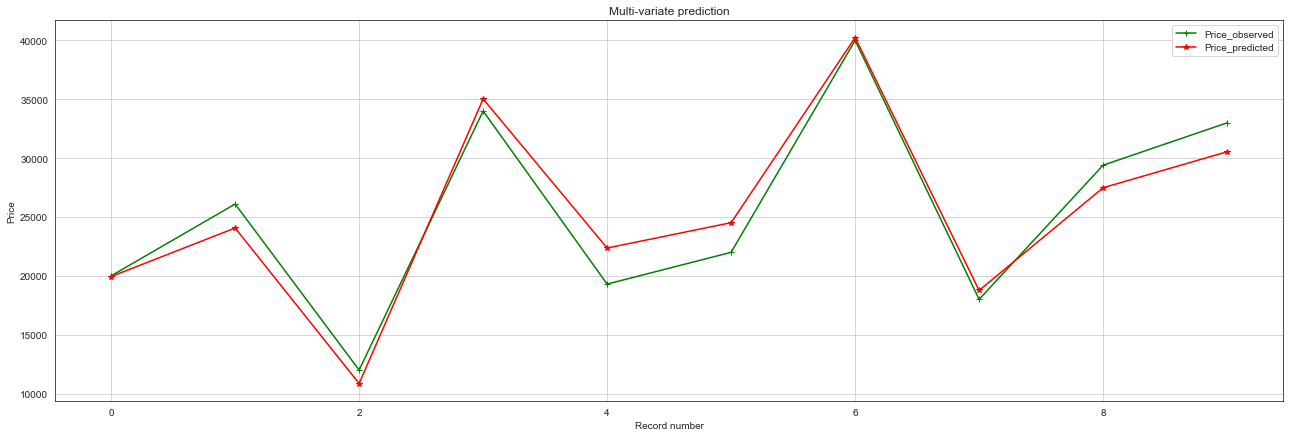

In [61]:
# Predicting the Test set results (displaying only for 100 reocrds)
x = np.arange(len(y_train_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_train[:100],"g-+",label="Price_observed")
plt.plot(x,y_train_pred[:100],"r-*",label="Price_predicted")
plt.grid(b=None) 
plt.xlabel("Record number")
plt.ylabel("Price")
plt.title("Multi-variate prediction")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

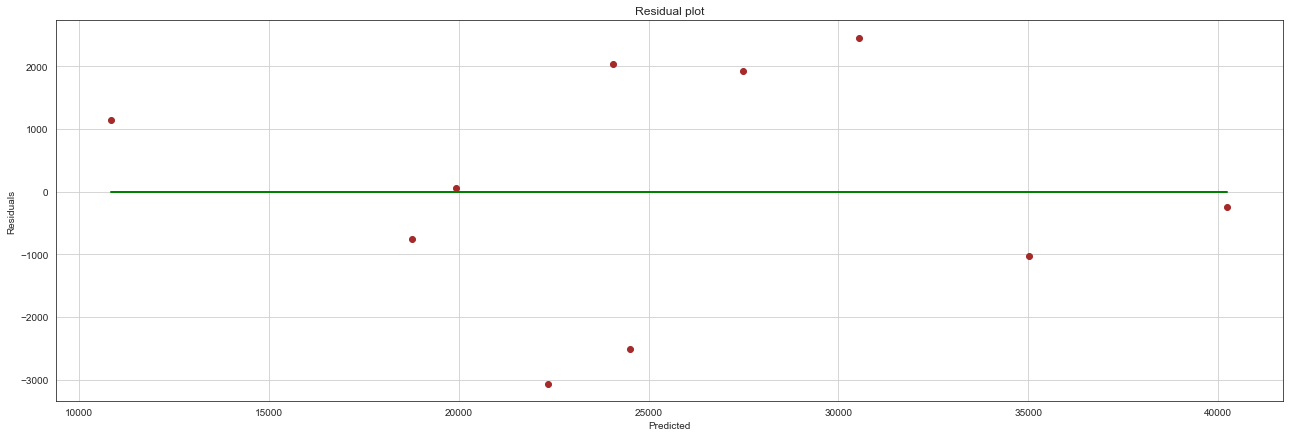

In [62]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_train-y_train_pred
zeros = y_train-y_train
plt.scatter(y_train_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_train_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

### Different error calculations to asses the model for training set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [63]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Train_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Train_SSE)

Sum of Squared Error (SSE) : 32587358.29


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [64]:
Train_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Train_MSE)

Mean Squared Error (MSE) : 3258735.83


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [65]:
Train_RMSE = np.round(np.sqrt(Train_MSE),2)
print("Root Mean Squared Error (RMSE) :",Train_RMSE)

Root Mean Squared Error (RMSE) : 1805.2


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [66]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  sum = sum + np.abs(diff)   
Train_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Train_MAE)

Mean Absolute Error (MAE) : 1522.98


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [67]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = (y_train[i] - y_train_pred[i])/y_train[i]
  sum = sum + np.abs(diff)  
Train_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Train_MAPE) 

Mean Absolute Percentage Error (MAPE) : 6.68


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [68]:
from sklearn.metrics import r2_score
out = r2_score(y_train,y_train_pred)
Train_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : 95.0 %


### Step 6: Testing phase

In [69]:
# Predicting values for test input set
y_test_pred = model.predict(x_test)

##### Visualizing the model

It involves more than 3 dimensions, so imagine yourself

##### Plotting observed sale (x) and predicted sale (y) for test set

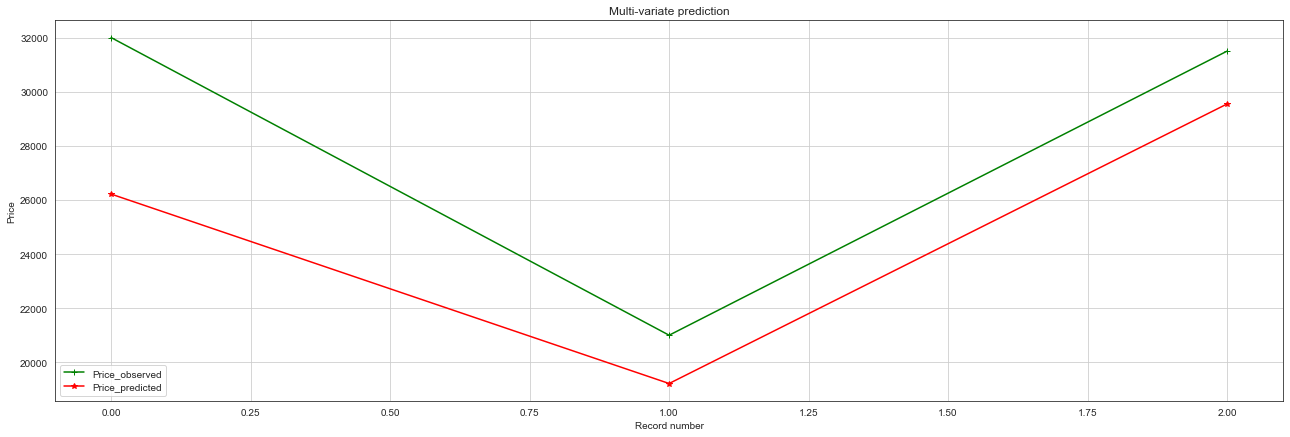

In [70]:
# Plotting the predicted values
x = np.arange(len(y_test_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_test,"g-+",label="Price_observed")
plt.plot(x,y_test_pred,"r-*",label="Price_predicted")
plt.grid(b=None) 
plt.xlabel("Record number")
plt.ylabel("Price")
plt.title("Multi-variate prediction")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

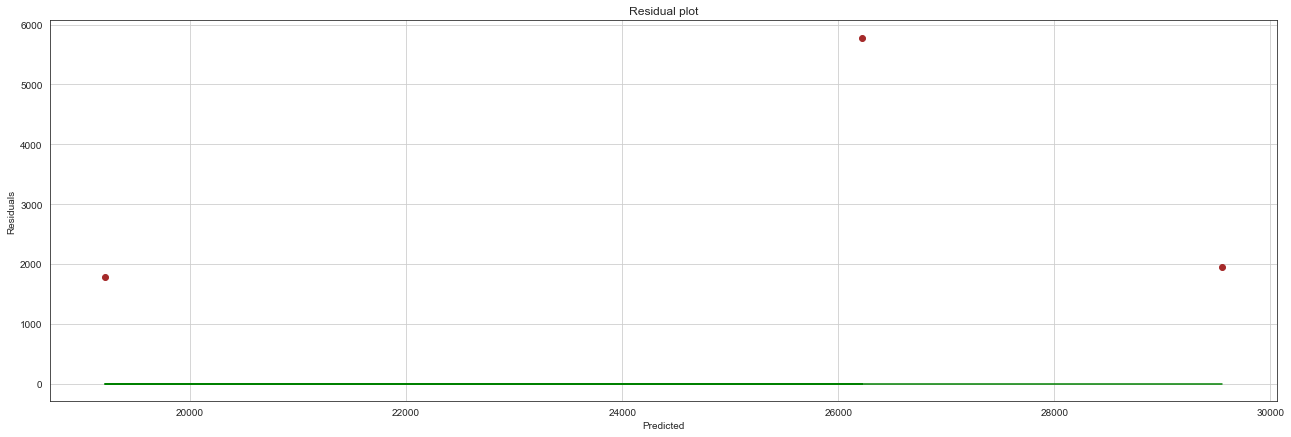

In [71]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_test-y_test_pred
zeros = y_test-y_test
plt.scatter(y_test_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_test_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

### Different error calculations to asses the model for the test set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [72]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Test_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Test_SSE)

Sum of Squared Error (SSE) : 40450871.58


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [73]:
Test_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Test_MSE)

Mean Squared Error (MSE) : 10862452.76


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [74]:
Test_RMSE = np.round(np.sqrt(Test_MSE),2)
print("Root Mean Squared Error (RMSE) :",Test_RMSE)

Root Mean Squared Error (RMSE) : 3295.82


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [75]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  sum = sum + np.abs(diff)   
Test_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Test_MAE)

Mean Absolute Error (MAE) : 3173.61


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [76]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = (y_test[i] - y_test_pred[i])/y_test[i]
  sum = sum + np.abs(diff)   
Test_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Test_MAPE) 

Mean Absolute Percentage Error (MAPE) : 10.92


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [77]:
from sklearn.metrics import r2_score
out = r2_score(y_test,y_test_pred)
Test_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for testing set :",Test_RS,"%")  

R-Squred value (goodness of model) for testing set : 48.0 %


### Step 7. Underfitting and overfitting observation

In [78]:
print("Error \t From training phase       From testing phase ")
print("===================================================")
print("SSE   \t\t",Train_SSE,"\t\t", Test_SSE)
print("MSE   \t\t",Train_MSE,"\t\t", Test_MSE)
print("RMSE   \t\t",Train_RMSE,"\t\t", Test_RMSE)
print("MAE   \t\t",Train_MAE,"\t\t", Test_MAE)
print("RS   \t\t",Train_RS,"\t\t\t", Test_RS)

Error 	 From training phase       From testing phase 
SSE   		 32587358.29 		 40450871.58
MSE   		 3258735.83 		 10862452.76
RMSE   		 1805.2 		 3295.82
MAE   		 1522.98 		 3173.61
RS   		 95.0 			 48.0


### Step 8. Let us predict for future inputs

Price of mercedez benz that is 4 yr old with mileage 45000? pass input as 45000,4,0,0 (the dropped feature (Price of mercedez benz) is taken as 1).

In [79]:
model.predict([[45000,4,0,0]])

array([35482.61265574])

Price of BMW X5 that is 7 yr old with mileage 86000? pass input as 86000,7,0,1 (the dropped feature (Price of mercedez benz) is taken as 0).

In [80]:
model.predict([[86000,7,0,1]])

array([14366.82569264])